In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
Datos= pd.read_csv('./Car details v3.csv')

In [51]:
Datos.head(50)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [52]:
Datos.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


Text(0.5, 1.0, 'identificacion de Datos Faltantes y Atipicos precio')

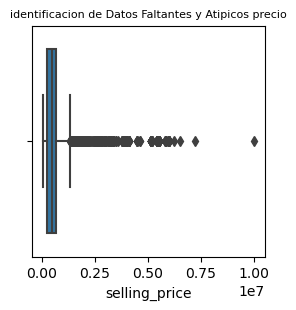

In [53]:
plt.figure(figsize=(3, 3))
sns.boxplot(x=Datos['selling_price'])
plt.title('identificacion de Datos Faltantes y Atipicos precio', fontsize=8)

In [55]:
print ("Cantidad de Registros con cero en millas o kilometros: ",Datos['mileage'].isin(['NaN']).sum())
print ("Cantidad de Registros con cero en si enciende: ",Datos['engine'].isin(['NaN']).sum())
print ("Cantidad de Registros con si tiene bateria: ",Datos['max_power'].isin(['NaN']).sum())
print ("Cantidad de Registros sin torque: ",Datos['torque'].isin(['NaN']).sum())
print ("Cantidad de Registros sin asientos: ",Datos['seats'].isin(['NaN']).sum())

Cantidad de Registros con cero en millas o kilometros:  0
Cantidad de Registros con cero en si enciende:  0
Cantidad de Registros con si tiene bateria:  0
Cantidad de Registros sin torque:  0
Cantidad de Registros sin asientos:  0


In [66]:
print ("Cantidad de Registros con cero en millas o kilometros: ",Datos['mileage'].isnull().sum())
print ("Cantidad de Registros con cero en si enciende: ",Datos['engine'].isnull().sum())
print ("Cantidad de Registros con si tiene bateria: ",Datos['max_power'].isnull().sum())
print ("Cantidad de Registros sin torque: ",Datos['torque'].isnull().sum())
print ("Cantidad de Registros sin asientos: ",Datos['seats'].isnull().sum())

Cantidad de Registros con cero en millas o kilometros:  221
Cantidad de Registros con cero en si enciende:  221
Cantidad de Registros con si tiene bateria:  215
Cantidad de Registros sin torque:  222
Cantidad de Registros sin asientos:  221


In [77]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [78]:
Datos['selling_price'].value_counts()

selling_price
300000     227
600000     213
350000     209
550000     204
450000     195
          ... 
308000       1
3900000      1
2850000      1
39000        1
746000       1
Name: count, Length: 677, dtype: int64

In [79]:
Datos[['selling_price']].head(50)

,selling_price
0,450000
1,370000
2,158000
3,225000
4,130000
5,440000
6,96000
7,45000
8,350000
9,200000


In [91]:
X=Datos.drop('selling_price',axis=1)
Y=Datos['selling_price']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,stratify=Y,random_state=0)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.